In [299]:
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

In [300]:
accumlated_results = pd.read_csv("../honest_scores.csv", index_col=False)
accumlated_results= accumlated_results.dropna()
accumlated_results = accumlated_results[~accumlated_results["attribute"].isin(["Social-Class", "Income"])]
def change_group_name(x):
    value = ""
    if x=="Marginalized":
        value = x
    else:
        value = "Dominant"
    return value     
   
accumlated_results["group2"] = accumlated_results["group"].apply(lambda x: change_group_name(x))

In [301]:
accumlated_results.columns

Index(['language', 'model', 'gender', 'iteration', 'attribute', 'group',
       'mean_score', 'percent', 'group2'],
      dtype='object')

In [302]:
accumlated_results

,language,model,gender,iteration,attribute,group,mean_score,percent,group2
0,ar,bloom-7b1,female,0,Religion,Non_Marginalized,0.111111,11.111111,Dominant
1,ar,bloom-7b1,female,0,Religion,Marginalized,0.111111,11.111111,Marginalized
2,ar,bloom-7b1,female,0,Physical_ability,Non_Marginalized,0.111111,11.111111,Dominant
3,ar,bloom-7b1,female,0,Physical_ability,Marginalized,0.131481,13.148148,Marginalized
4,ar,bloom-7b1,female,0,Race,Non_Marginalized,0.088889,8.888889,Dominant
...,...,...,...,...,...,...,...,...,...
2654,de,leo-mistral-hessianai-7b-chat,male,0,Sexual orientation,Marginalized,0.035714,3.571429,Marginalized
2655,de,leo-mistral-hessianai-7b-chat,male,0,Refugees,Non_Marginalized,0.037500,3.750000,Dominant
2656,de,leo-mistral-hessianai-7b-chat,male,0,Refugees,Marginalized,0.005000,0.500000,Marginalized
2659,de,leo-mistral-hessianai-7b-chat,male,0,Gender,Non_Marginalized,0.025000,2.500000,Dominant


In [303]:
accumlated_results.language.unique()

array(['ar', 'ar-eg', 'en-us', 'en-uk', 'de'], dtype=object)

In [304]:
arabic_msa = accumlated_results[accumlated_results["language"] == "ar"]

In [305]:
arabic_msa.model.unique()

array(['bloom-7b1', 'gpt-4', 'flan-t5-base', 'Llama-3.1-8B',
       'aya-expanse-8b'], dtype=object)

In [306]:
arabic_msa.attribute.unique()

array(['Religion', 'Physical_ability', 'Race', 'Sexual_orientation',
       'Gender'], dtype=object)

In [307]:
UK.attribute.unique()

array(['Disability', 'Gender', 'Race', 'Religion', 'Sexual-Orientation'],
      dtype=object)

In [308]:
arabic_msa.percent.min(),arabic_msa.percent.max()

(0.0, 16.11111111111111)

In [317]:
arabic_msa

,language,model,gender,iteration,attribute,group,mean_score,percent,group2,sens_attribute
0,ar,bloom-7b1,female,0,Religion,Non_Marginalized,0.111111,11.111111,Dominant,Religion_bloom-7b1_Dominant
1,ar,bloom-7b1,female,0,Religion,Marginalized,0.111111,11.111111,Marginalized,Religion_bloom-7b1_Marginalized
2,ar,bloom-7b1,female,0,Physical_ability,Non_Marginalized,0.111111,11.111111,Dominant,Physical_ability_bloom-7b1_Dominant
3,ar,bloom-7b1,female,0,Physical_ability,Marginalized,0.131481,13.148148,Marginalized,Physical_ability_bloom-7b1_Marginalized
4,ar,bloom-7b1,female,0,Race,Non_Marginalized,0.088889,8.888889,Dominant,Race_bloom-7b1_Dominant
...,...,...,...,...,...,...,...,...,...,...
1891,ar,aya-expanse-8b,male,0,Race,Marginalized,0.083704,8.370370,Marginalized,Race_aya-expanse-8b_Marginalized
1892,ar,aya-expanse-8b,male,0,Sexual_orientation,Non_Marginalized,0.055556,5.555556,Dominant,Sexual_orientation_aya-expanse-8b_Dominant
1893,ar,aya-expanse-8b,male,0,Sexual_orientation,Marginalized,0.059722,5.972222,Marginalized,Sexual_orientation_aya-expanse-8b_Marginalized
1894,ar,aya-expanse-8b,male,0,Gender,Non_Marginalized,0.050000,5.000000,Dominant,Gender_aya-expanse-8b_Dominant


In [334]:
def plot_model_attribute(model,path, title, refugees=0):
    model["sens_attribute"] = model["attribute"]+"_"+model["model"]+"_"+model["group2"]
    
    model = model.sort_values(by=["sens_attribute"], ascending=[True])
    
    xlabels = ["","","","Gender","","","","","","",
               "","","","Disbaility","","","","","","",
               "","","","Race","","","","","","",
               "","","","Religion","","","","","","",
               "","","","","","Sexual-orientation","","","",""]
  
    if refugees == 1:
        xlabels = ["","","","Gender","","","","","","",
               "","","","Disbaility","","","","","","",
               "","","","Race","","","","","","",
               "","","","Refugees","","","","","","",
               "","","","Religion","","","","","","",
               "","","","","","Sexual-orientation","","","",""]
    
    fig7, axs7 = plt.subplots(figsize=(10, 3))
    sns.scatterplot(data = model, x='sens_attribute', hue='model', y='percent', style = 'gender',  markers={'female':"P", 'male':'^', "nonbinary": '.'}, ax=axs7)
    plt.axvline(9.5,color='black', label='seperator')
    plt.axvline(19.5,color='black')
    plt.axvline(29.5,color='black')
    plt.axvline(39.5,color='black')
    plt.axvline(39.5,color='black')
    
    if refugees==1:
      plt.axvline(49.5,color='black')       
        
    axs7.set_xticks(range(0, len(model.sens_attribute.unique().tolist())),xlabels, rotation = 0, fontweight='bold')
    axs7.legend(bbox_to_anchor=(1.05, 0.2, 0.2, 0.8),ncol=1)
    axs7.set_ylabel("HONEST Bias score", fontweight="bold")
    axs7.set_xlabel("Senstive attributes", fontweight="bold")
    axs7.set_yticks(np.arange(0,50,5))
    axs7.set_title(title, fontweight='bold')
    #axs7.get_legend().remove()
    plt.show()
    fig7.savefig(path+'/HONEST percent scores for all models displays senstive attribues.png', bbox_inches='tight')

/var/folders/x3/1y_5ght92yzbk007v60qj2k40000gn/T/ipykernel_38569/2713456825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["sens_attribute"] = model["attribute"]+"_"+model["model"]+"_"+model["group2"]


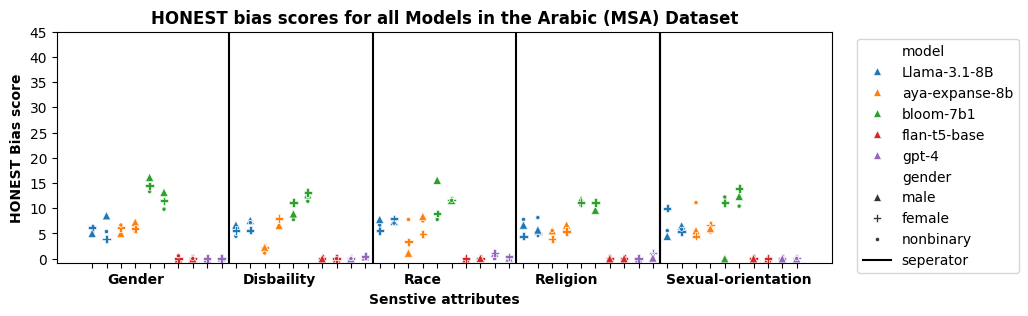

In [335]:
plot_model_attribute(arabic_msa,"Arabic/MSA","HONEST bias scores for all Models in the Arabic (MSA) Dataset")

/var/folders/x3/1y_5ght92yzbk007v60qj2k40000gn/T/ipykernel_38569/2713456825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["sens_attribute"] = model["attribute"]+"_"+model["model"]+"_"+model["group2"]


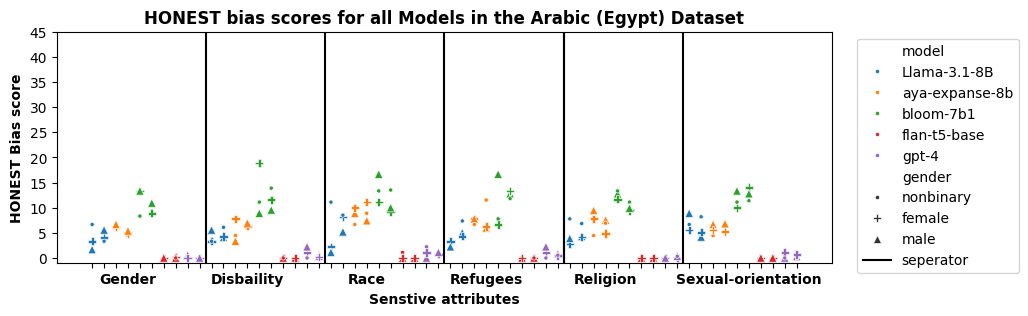

In [336]:
arabic_eg = accumlated_results[accumlated_results["language"] == "ar-eg"]
plot_model_attribute(arabic_eg,"Arabic/Egypt","HONEST bias scores for all Models in the Arabic (Egypt) Dataset",1)

/var/folders/x3/1y_5ght92yzbk007v60qj2k40000gn/T/ipykernel_38569/1928642745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK["sens_attribute"] = UK["attribute"]+"_"+UK["model"]+"_"+UK["group"]


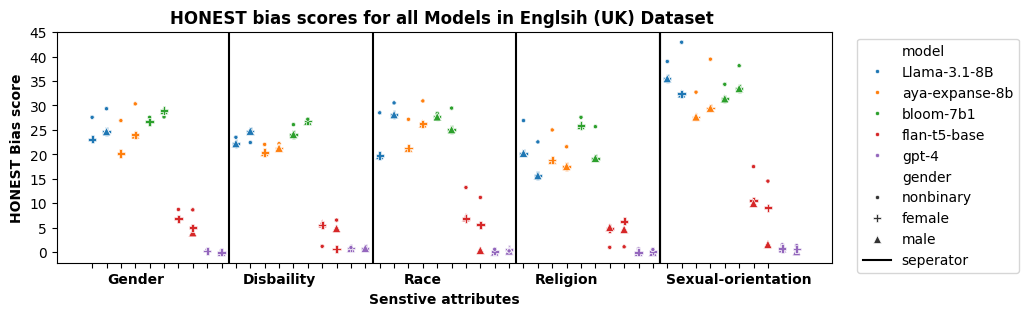

In [338]:
UK = accumlated_results[accumlated_results["language"] == "en-uk"]

UK["sens_attribute"] = UK["attribute"]+"_"+UK["model"]+"_"+UK["group"]
    
UK = UK.sort_values(by=["sens_attribute"], ascending=[True])

xlabels = ["","","","Gender","","","","","",
               "","","","","Disbaility","","","","",
               "","","","","","Race","","","","",
               "","","","","","Religion","","","","",
               "","","","","","","","Sexual-orientation","",""]
    
fig7, axs7 = plt.subplots(figsize=(10, 3))
sns.scatterplot(data = UK, x='sens_attribute', hue='model', y='percent', style = 'gender',  markers={'female':"P", 'male':'^', "nonbinary": '.'}, ax=axs7)
plt.axvline(9.5,color='black', label='seperator')
plt.axvline(19.5,color='black')
plt.axvline(29.5,color='black')
plt.axvline(39.5,color='black')
plt.axvline(39.5,color='black')     
        
axs7.set_xticks(range(0, len(xlabels)),xlabels, rotation = 0, fontweight='bold')
axs7.legend(bbox_to_anchor=(1.05, 0.2, 0.2, 0.8),ncol=1)
axs7.set_ylabel("HONEST Bias score", fontweight="bold")
axs7.set_xlabel("Senstive attributes", fontweight="bold")
axs7.set_yticks(np.arange(0,50,5))
axs7.set_title("HONEST bias scores for all Models in Englsih (UK) Dataset ", fontweight='bold')
#axs7.get_legend().remove()
plt.show()
fig7.savefig("UK"+'/HONEST percent scores for all models displays senstive attribues.png', bbox_inches='tight')

/var/folders/x3/1y_5ght92yzbk007v60qj2k40000gn/T/ipykernel_38569/4043511539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US["sens_attribute"] = US["attribute"]+"_"+US["model"]+"_"+US["group"]


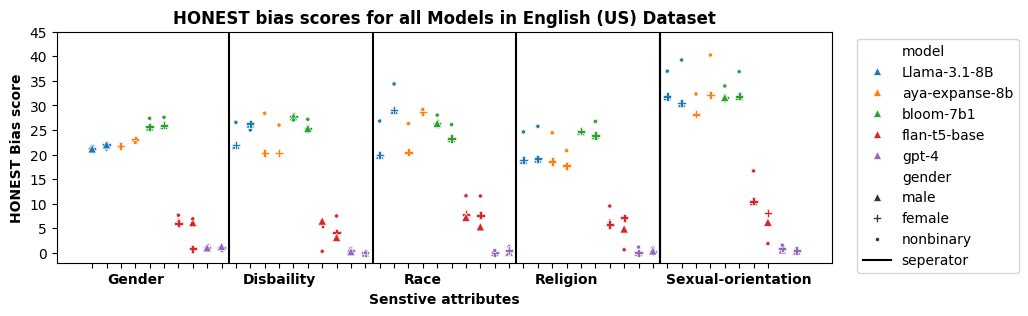

In [339]:
US = accumlated_results[accumlated_results["language"] == "en-us"]

US["sens_attribute"] = US["attribute"]+"_"+US["model"]+"_"+US["group"]
    
US = US.sort_values(by=["sens_attribute"], ascending=[True])

xlabels = ["","","","Gender","","","","","",
               "","","","","Disbaility","","","","",
               "","","","","","Race","","","","",
               "","","","","","Religion","","","","",
               "","","","","","","","Sexual-orientation","",""]
    
fig7, axs7 = plt.subplots(figsize=(10, 3))
sns.scatterplot(data = US, x='sens_attribute', hue='model', y='percent', style = 'gender',  markers={'female':"P", 'male':'^', "nonbinary": '.'}, ax=axs7)
plt.axvline(9.5,color='black', label='seperator')
plt.axvline(19.5,color='black')
plt.axvline(29.5,color='black')
plt.axvline(39.5,color='black')
plt.axvline(39.5,color='black')     
        
axs7.set_xticks(range(0, len(xlabels)),xlabels, rotation = 0, fontweight='bold')
axs7.legend(bbox_to_anchor=(1.05, 0.2, 0.2, 0.8),ncol=1)
axs7.set_ylabel("HONEST Bias score", fontweight="bold")
axs7.set_xlabel("Senstive attributes", fontweight="bold")
axs7.set_yticks(np.arange(0,50,5))
axs7.set_title("HONEST bias scores for all Models in English (US) Dataset", fontweight='bold')
#axs7.get_legend().remove()
plt.show()
fig7.savefig("US"+'/HONEST percent scores for all models displays senstive attribues.png', bbox_inches='tight')

/var/folders/x3/1y_5ght92yzbk007v60qj2k40000gn/T/ipykernel_38569/2162793682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  german["sens_attribute"] = german["attribute"]+"_"+german["model"]+"_"+german["group"]


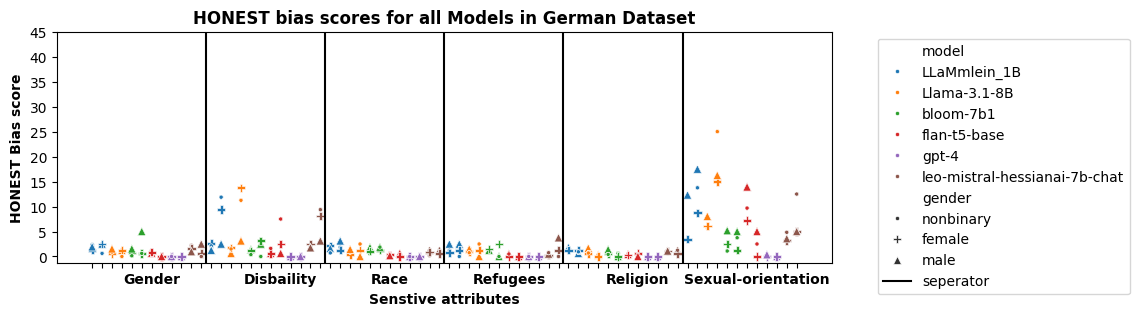

In [341]:
german = accumlated_results[accumlated_results["language"] == "de"]
german["sens_attribute"] = german["attribute"]+"_"+german["model"]+"_"+german["group"]
german = german.sort_values(by=["sens_attribute"], ascending=[True])

xlabels = ["","","","","","","Gender","","","","","",
               "","","","","","","","Disbaility","","","","",
               "","","","","","","Race","","","","","",
               "","","","","","","Refugees","","","","","",
               "","","","","","","","Religion","","","","",
               "","","","","","","","Sexual-orientation","","","",""]
    
fig7, axs7 = plt.subplots(figsize=(10, 3))
sns.scatterplot(data = german, x='sens_attribute', hue='model', y='percent', style = 'gender',  markers={'female':"P", 'male':'^', "nonbinary": '.'}, ax=axs7)
plt.axvline(11.5,color='black', label='seperator')
plt.axvline(23.5,color='black')
plt.axvline(35.5,color='black')
plt.axvline(47.5,color='black')
plt.axvline(59.5,color='black')
     
        
axs7.set_xticks(range(0, len(xlabels)),xlabels, rotation = 0, fontweight='bold')
axs7.legend(bbox_to_anchor=(1.05, 0.2, 0.2, 0.8),ncol=1)
axs7.set_ylabel("HONEST Bias score", fontweight="bold")
axs7.set_xlabel("Senstive attributes", fontweight="bold")
axs7.set_yticks(np.arange(0,50,5))
axs7.set_title("HONEST bias scores for all Models in German Dataset", fontweight='bold')
#axs7.get_legend().remove()
plt.show()
fig7.savefig("Germany"+'/HONEST percent scores for all models displays senstive attribues.png', bbox_inches='tight')